## Матрицы. Оптимизация.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
A = np.random.uniform(-10,10,size=(5,5))
A

In [ ]:
A - 1

### Представление изображений матрицами

In [ ]:
img = cv2.imread("dsh_fall_sqr_small.JPG")
img.shape

In [ ]:
imgbw = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = img[:,:,::-1]
plt.imshow(imgbw,cmap='gray')

In [ ]:
np.mean(img,axis=2).shape

In [ ]:
plt.imshow(img[30:80,30:80])

In [ ]:
plt.imshow(cv2.resize(img,(100,10),cv2.INTER_LANCZOS4))

In [ ]:
from math import sin,cos,pi

rot = lambda a: np.array([[cos(a), sin(a), 0],[-sin(a),cos(a),0]])
trans = lambda d : np.array([[0,0,d[0]],[0,0,d[1]]])

plt.imshow(cv2.warpAffine(img,rot(pi/4)+trans((0,100)),(200,200)))


### Видео. Обнаружение движения

In [ ]:
cap = cv2.VideoCapture("motionvideo.mp4")
res = []
while cap.isOpened():
    ret,frame = cap.read()
    if ret:
        res.append(frame[:,:,::-1])
    else:
        break
frames = np.array(res)

In [ ]:
frames.shape

In [ ]:
plt.imshow(frames[220])

In [ ]:
def display_images(l,titles=None,fontsize=12):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
        if titles is not None:
            ax[i].set_title(titles[i],fontsize=fontsize)
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

display_images(frames[::150])

In [ ]:
bwframes = [cv2.cvtColor(x,cv2.COLOR_BGR2GRAY) for x in frames]
diffs = [(p2-p1) for p1,p2 in zip(bwframes[:-1],bwframes[1:])]
diff_amps = np.array([np.linalg.norm(x) for x in diffs])
plt.plot(diff_amps)
display_images(diffs[::150],titles=diff_amps[::150],fontsize=20)

In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

threshold = 13000

plt.plot(moving_average(diff_amps,10))
plt.axhline(y=threshold, color='r', linestyle='-')

In [ ]:
active_frames = np.where(diff_amps>threshold)[0]

def subsequence(seq,min_length=30):
    ss = []
    for i,x in enumerate(seq[:-1]):
        ss.append(x)
        if x+1 != seq[i+1]:
            if len(ss)>min_length:
                return ss
            ss.clear()

sub = subsequence(active_frames)
print(sub)

In [ ]:
plt.imshow(frames[(sub[0]+sub[-1])//2])


### Системы линейных алгебраических уравнений (СЛАУ)

Рассмотрим систему уравнений:
$$
\begin{cases}
x_1+x_2+x_3 = 2 \\
2x_1+3x_2-x_3 = 5\\
x_1-x_2+x_3 = 0\\
\end{cases}
$$
Она может быть представлена в матричной форме
$$
\begin{pmatrix} 1 & 1 & 1 \\ 2 & 3 & -1 \\ 1 & -1 & 1\end{pmatrix} \times
\begin{pmatrix} x_1 \\ x_2 \\ x_3 \end{pmatrix} =
\begin{pmatrix} 2 \\ 5 \\ 0 \end{pmatrix}
$$

In [ ]:
np.set_printoptions(precision=3)

A = np.array([[1,1,1],[2,3,-1],[1,-1,1]],dtype=np.float32)
b = np.array([2,5,0],dtype=np.float32)

A = np.random.normal(size=(7,7))
b = np.random.normal(size=(7,))

In [ ]:
x = np.linalg.inv(A)@b
x

In [ ]:
A@x

In [ ]:
def diag(A,b):
  n = A.shape[0]
  for i in range(n):
    for j in range(i):
      coef = A[i,j]/A[j,j]
      A[i] = A[i]-coef*A[j]
      b[i] = b[i]-coef*b[j]
    b[i] = b[i]/A[i,i]
    A[i] = A[i]/A[i,i]

print(A,b)
diag(A,b)
print(A,b)

In [ ]:
def solve(A,b):
    n = A.shape[0]
    for i in range(n-2,-1,-1):
        for j in range(i+1,n):
            coef = A[i,j]
            A[i]=A[i]-A[j]*coef
            b[i]=b[i]-b[j]*coef
solve(A,b)
A,b

### Метод наименьших квадратов

In [ ]:
x = np.random.uniform(10,100,100)
y = 2*x+1+np.random.uniform(-30,30,100)
plt.scatter(x,y)

In [ ]:
n = len(x)
a = (x.sum()*y.sum()-n*(x*y).sum())/(x.sum()**2-n*(x**2).sum())
b = (y.sum()*(x**2).sum()-x.sum()*(x*y).sum())/(x**2).sum()/(n-x.sum())
print(a,b)

In [ ]:
plt.scatter(x,y)
plt.plot(x,a*x+b,color='r')

## Оптимизация. Градиентный спуск

In [56]:
f = lambda x,y : (x-2)**2 + (y+1)**2 + 5

def f(x,y):
    return (x-2)**2 + (y+1)**2 + 5

In [58]:
f(np.array([1,2]),np.array([2,3]))

array([15, 21])

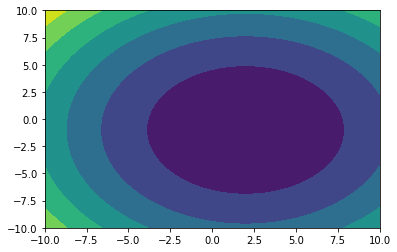

In [59]:
Xf,Yf = np.meshgrid(np.linspace(-10,10,50), np.linspace(-10,10,50))
Zf = f(Xf,Yf)
plt.contourf(Xf,Yf,Zf)

In [85]:
def d(f,x,dx=0.1):
  return (f(x+dx)-f(x))/dx

dfdx = lambda x,y : d(lambda t : f(t,y),x)
dfdy = lambda x,y : d(lambda t : f(x,t),y)

x,y = -8,-8
X,Y = [],[]
eta = 0.1
for _ in range(15):
  X.append(x); Y.append(y)
  x-=eta*dfdx(x,y)
  y-=eta*dfdy(x,y)
  print(f"x={x}, y={y}, z={f(x,y)}")

x=-6.009999999999991, y=-6.610000000000014, z=100.63220000000001
x=-4.417999999999992, y=-5.498000000000005, z=66.42272799999994
x=-3.1444000000000045, y=-4.60840000000001, z=44.48540192000012
x=-2.1255200000000016, y=-3.896720000000009, z=30.410902028800066
x=-1.3104160000000036, y=-3.327376000000008, z=21.37553313843206
x=-0.6583328000000037, y=-2.871900800000006, z=15.570745880596522
x=-0.13666624000000205, y=-2.5075206400000045, z=11.83796110118177
x=0.280667008, y=-2.216016512000003, z=9.434802094836325
x=0.6145336064000002, y=-1.9828132096000033, z=7.88543893275925
x=0.8816268851200011, y=-1.7962505676800031, z=6.884773390617118
x=1.095301508096001, y=-1.6470004541440026, z=6.2370889489159165
x=1.2662412064768018, y=-1.5276003633152024, z=5.816764110442953
x=1.4029929651814417, y=-1.432080290652162, z=5.543110777192904
x=1.5123943721451534, y=-1.3556642325217299, z=5.36425629461099
x=1.5999154977161227, y=-1.2945313860173844, z=5.246816346317059


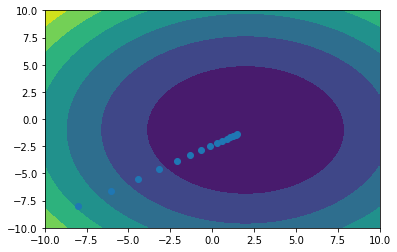

In [86]:
plt.contourf(Xf,Yf,Zf)
plt.scatter(X,Y)

### Оптимизация для регрессии

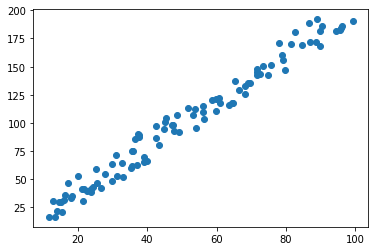

In [87]:
x = np.random.uniform(10,100,100)
y = 2*x+1+np.random.uniform(-15,15,100)
plt.scatter(x,y)

In [88]:
def loss(a,b):
    py = a*x+b
    return np.mean((y-py)**2)

loss(1,2)

2967.7293984411117

In [95]:
a,b = 0,0
A,B = [],[]
eta = 0.0001
for _ in range(30):
    A.append(a); B.append(b)
    a-=eta*d(lambda x: loss(x,b),a)
    b-=eta*d(lambda x: loss(a,x),b)
    print(f"loss = {loss(a,b)}, a={a}, b={b}")

loss = 1871.7481016520248, a=1.232958924203109, b=0.007557542314734292
loss = 363.4687152565152, a=1.6805872815356995, b=0.010577804137991222
loss = 131.70469976676924, a=1.8430969062840465, b=0.011950769729309883
loss = 89.19037292488879, a=1.902092552315042, b=0.012725664325613764
loss = 79.24253915462606, a=1.9235068592954572, b=0.01328341512224239
loss = 76.35434119029081, a=1.9312770473743521, b=0.013762319906287488
loss = 75.40126847927107, a=1.9340936605881889, b=0.014212588477021157
loss = 75.06798882774632, a=1.9351118504198583, b=0.014652449788301396
loss = 74.94881937827405, a=1.9354771125757493, b=0.015088521966009523
loss = 74.90594595625227, a=1.9356053257927333, b=0.015523207758835738
loss = 74.89058274712136, a=1.9356474772135923, b=0.01595737949878523
loss = 74.88518233482561, a=1.9356583835799928, b=0.016391353891373767
loss = 74.88339571950958, a=1.9356579464220316, b=0.016825245918757375
loss = 74.88292071949374, a=1.9356533911034925, b=0.017259097326277995
loss = 7

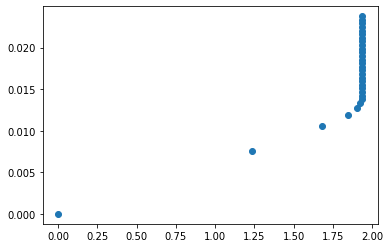

In [96]:
plt.scatter(A,B)

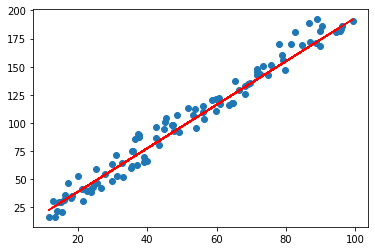

In [97]:
plt.scatter(x,y)
plt.plot(x,a*x+b,color='r')

## Реальные данные

In [109]:
import pandas as pd
df = pd.read_csv("data/renfe-tickets.csv")
df

,origin,destination,vehicle_class,price
0,MADRID,BARCELONA,Turista,108.90
1,MADRID,BARCELONA,Turista Plus,115.65
2,MADRID,BARCELONA,Turista,108.90
3,MADRID,BARCELONA,Turista,108.90
4,MADRID,BARCELONA,Turista,108.90
...,...,...,...,...
1246671,ZARAGOZA,BARCELONA,Turista Plus,54.75
1246672,ZARAGOZA,BARCELONA,Turista,60.90
1246673,ZARAGOZA,BARCELONA,Turista,53.60
1246674,ZARAGOZA,BARCELONA,Turista,60.90


In [115]:
cities = dict(enumerate(set(df['origin'])))
c2id = { v : k for k,v in cities.items() }
cities

{0: 'MADRID',
 1: 'SEVILLA',
 2: 'ZARAGOZA',
 3: 'VALLADOLID',
 4: 'BARCELONA',
 5: 'LEÓN',
 6: 'CÓRDOBA',
 7: 'VALENCIA',
 8: 'MÁLAGA'}

In [121]:
P = np.zeros(shape=(len(cities),len(cities)))
C = np.zeros_like(P)

for _,r in df.iterrows():
    oid = c2id[r['origin']]
    did = c2id[r['destination']]
    C[oid,did]+=1.0
    P[oid,did]+=r['price']

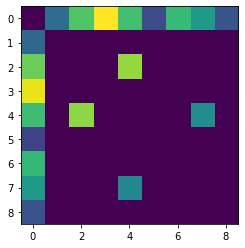

In [126]:
plt.imshow(C)

In [137]:
R = P/C
R[~(R>0)]=0
R

C:\Users\dmitr\AppData\Local\Temp\ipykernel_7776\652265645.py:1: RuntimeWarning: invalid value encountered in true_divide
  R = P/C


array([[ 0.        , 55.63023019, 46.79952917, 31.43426546, 88.67386943,
        33.9459046 , 48.61764989, 38.47359528, 56.5886107 ],
       [53.10882997,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [44.8607342 ,  0.        ,  0.        ,  0.        , 46.57774315,
         0.        ,  0.        ,  0.        ,  0.        ],
       [31.63690227,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [87.65076259,  0.        , 45.02321235,  0.        ,  0.        ,
         0.        ,  0.        , 28.39870183,  0.        ],
       [35.73653221,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [48.36026877,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [47.6511892 ,  0.        ,  0.        ,  0.        , 29

In [160]:
res = df.groupby(['origin','destination'])\
    .agg({ 'price' : 'mean', 'vehicle_class' : 'count'})\
    .rename(columns={'vehicle_class' : 'count'})\
    .reset_index()
res

,origin,destination,price,count
0,BARCELONA,MADRID,87.650763,74601
1,BARCELONA,VALENCIA,28.398702,52805
2,BARCELONA,ZARAGOZA,45.023212,89570
3,CÓRDOBA,MADRID,48.360269,72068
4,LEÓN,MADRID,35.736532,21544
5,MADRID,BARCELONA,88.673869,75701
6,MADRID,CÓRDOBA,48.617650,72720
7,MADRID,LEÓN,33.945905,24674
8,MADRID,MÁLAGA,56.588611,27899
9,MADRID,SEVILLA,55.630230,38794


In [143]:
wc = pd.read_csv("data/worldcities.csv")
wc

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
42900,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
42901,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
42902,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
42903,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


In [146]:
wc[(wc['city'].apply(lambda x: x.upper())=='BARCELONA')&(wc['country']=='Spain')]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
159,Barcelona,Barcelona,41.3825,2.1769,Spain,ES,ESP,Catalonia,admin,4735000.0,1724594040


In [158]:
from haversine import haversine,Unit

def get_ll(z):
    return wc[(wc['city'].apply(lambda x: x.upper())==z)&(wc['country']=='Spain')][['lat','lng']].to_numpy()[0]


In [159]:

def dist(x,y):
    p1 = get_ll(x)
    p2 = get_ll(y)
    return haversine(p1,p2,Unit.KILOMETERS)

dist('BARCELONA','VALENCIA')

303.1806944035139

In [168]:
res['dist'] = res.apply(lambda x : dist(x['origin'],x['destination']),axis=1)
res

,origin,destination,price,count,dist
0,BARCELONA,MADRID,87.650763,74601,506.741151
1,BARCELONA,VALENCIA,28.398702,52805,303.180694
2,BARCELONA,ZARAGOZA,45.023212,89570,256.506445
3,CÓRDOBA,MADRID,48.360269,72068,296.103026
4,LEÓN,MADRID,35.736532,21544,288.173699
5,MADRID,BARCELONA,88.673869,75701,506.741151
6,MADRID,CÓRDOBA,48.617650,72720,296.103026
7,MADRID,LEÓN,33.945905,24674,288.173699
8,MADRID,MÁLAGA,56.588611,27899,415.639080
9,MADRID,SEVILLA,55.630230,38794,389.790764


<AxesSubplot:xlabel='dist', ylabel='price'>

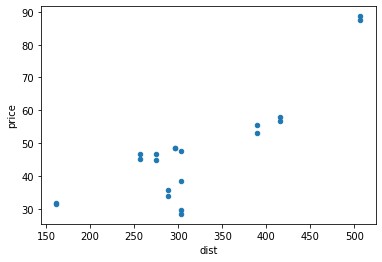

In [169]:
res.plot.scatter('dist','price')

In [179]:
res['dir'] = res.apply(lambda x : 'red' if x['origin']>x['destination'] else 'blue', axis=1)
res

,origin,destination,price,count,dist,dir
0,BARCELONA,MADRID,87.650763,74601,506.741151,blue
1,BARCELONA,VALENCIA,28.398702,52805,303.180694,blue
2,BARCELONA,ZARAGOZA,45.023212,89570,256.506445,blue
3,CÓRDOBA,MADRID,48.360269,72068,296.103026,blue
4,LEÓN,MADRID,35.736532,21544,288.173699,blue
5,MADRID,BARCELONA,88.673869,75701,506.741151,red
6,MADRID,CÓRDOBA,48.617650,72720,296.103026,red
7,MADRID,LEÓN,33.945905,24674,288.173699,red
8,MADRID,MÁLAGA,56.588611,27899,415.639080,blue
9,MADRID,SEVILLA,55.630230,38794,389.790764,blue


<AxesSubplot:xlabel='dist', ylabel='price'>

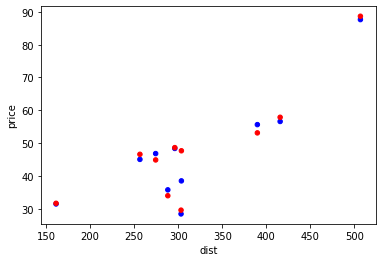

In [180]:
res.plot.scatter('dist','price',c='dir')

In [182]:
cache = {}
def fastdist(x,y):
    if cache.get(x+y):
        return cache.get(x+y)
    z = dist(x,y)
    cache[x+y] = z
    return z

In [183]:
df['dist'] = df.apply(lambda x : fastdist(x['origin'],x['destination']),axis=1)
df

,origin,destination,vehicle_class,price,dist
0,MADRID,BARCELONA,Turista,108.90,506.741151
1,MADRID,BARCELONA,Turista Plus,115.65,506.741151
2,MADRID,BARCELONA,Turista,108.90,506.741151
3,MADRID,BARCELONA,Turista,108.90,506.741151
4,MADRID,BARCELONA,Turista,108.90,506.741151
...,...,...,...,...,...
1246671,ZARAGOZA,BARCELONA,Turista Plus,54.75,256.506445
1246672,ZARAGOZA,BARCELONA,Turista,60.90,256.506445
1246673,ZARAGOZA,BARCELONA,Turista,53.60,256.506445
1246674,ZARAGOZA,BARCELONA,Turista,60.90,256.506445


In [188]:
d = dict(enumerate(set(df['vehicle_class'])))
rd = { v : k for k,v in d.items() }
df['class'] = df['vehicle_class'].apply(lambda x : rd[x]+1)

<AxesSubplot:xlabel='dist', ylabel='price'>

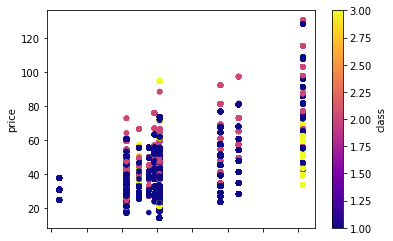

In [191]:
df.plot.scatter('dist','price',c='class',cmap='plasma')

In [192]:
x = df['dist']
y = df['price']
n = len(x)
a = (x.sum()*y.sum()-n*(x*y).sum())/(x.sum()**2-n*(x**2).sum())
b = (y.sum()*(x**2).sum()-x.sum()*(x*y).sum())/(x**2).sum()/(n-x.sum())
print(a,b)

0.15121872433691635 -0.0006853608377870473


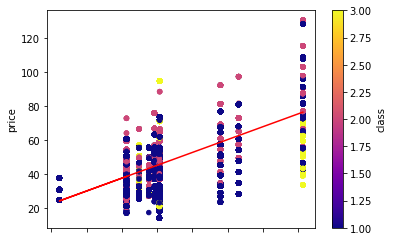

In [193]:
df.plot.scatter('dist','price',c='class',cmap='plasma')
plt.plot(x,a*x+b,color='red')

## TensorFlow

In [98]:
import tensorflow as tf

In [105]:
f = lambda x : tf.reduce_sum((x-tf.constant([1.0,2.0]))**2)+5.0


In [108]:
x = tf.Variable([0.0,0.0])
eta = 0.1
for i in range(15):
    print(f"x={x.numpy()}, f={f(x)}")
    with tf.GradientTape() as t:
        z = f(x)
        df = t.gradient(z,x)
    x.assign_add(-eta*df)

x=[0. 0.], f=10.0
x=[0.2 0.4], f=8.200000762939453
x=[0.36 0.72], f=7.047999858856201
x=[0.48800004 0.9760001 ], f=6.310719966888428
x=[0.59040004 1.1808001 ], f=5.838860511779785
x=[0.67232 1.34464], f=5.536870956420898
x=[0.73785603 1.4757121 ], f=5.343597412109375
x=[0.7902848 1.5805696], f=5.219902515411377
x=[0.8322278 1.6644557], f=5.140737533569336
x=[0.86578226 1.7315645 ], f=5.090072154998779
x=[0.8926258 1.7852516], f=5.05764627456665
x=[0.91410065 1.8282013 ], f=5.036893367767334
x=[0.9312805 1.862561 ], f=5.023612022399902
x=[0.9450244 1.8900487], f=5.015111446380615
x=[0.9560195 1.912039 ], f=5.009671211242676
